# CLUSTERING
The goal of this exercise is to explore both visual and practically the foundations of clustering. We'll center our approach around KMeans as its the most well known algorithm for clustering. In the first part, you have to try different initializations of KMeans and explore visually its results. In the second one, you have to try KMeans with a more real dataset, test differenet parameters and also test a dimensionality reduction.

We're working with 2 different datasets: 

###- Toy dataset
In Dataset folder, under BADS_T2_kmeans.csv

###- Bigger one
From the Infobae dataset (infobae-ga.ga_sessions), for each session keep the country, device, browser, source, total of hits, pageviews and timeonsite. Use only the 1st day of 2021.


## VERSION 1

First, you have to import the datasets

### SMALL DATASET

Now, you have to visualize in 3D the dataset and think for your own how many clusters the data has.

In [ ]:
data.shape

(200, 3)

After that, you have to run KMeans with only 1 initialization pear each run and visualize the results. The goal is to see the variation between each run.

Finally, you have to check whether the number of clusters you decided to form agree with the ones from the elbow method (for similarity and silhouette).

### BIG DATASET

Do some preprocessing in order to deal with the dataset.

After that, you have to apply KMeans deciding with the elbow method which should be the number of clusters.

Now, you have to print the centroids of each cluster and try to interpret the results.

Next, you have to apply a classical PCA to the dataset to reduce the dataset in 3 dimensions and run KMeans against the reduced dataset.

Visualize it and check visually if it makes sense.

(Optional) Get the results from this last run and pair them to the original data to see how does it perform and if the clusters can have some interpretation.

## SOLUTION

First, you have to import the datasets.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Data Science/Training/Exercises/Datasets/BADS_T2_kmeans (1).csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x,y,z
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
from google.cloud import bigquery
project_id = 'mh-dt3'
client = bigquery.Client(project=project_id)
df = client.query('''
SELECT 
  geoNetwork.country,
  device.deviceCategory,
  device.browser,
  trafficSource.source,
  totals.hits,
  totals.pageviews,
  totals.timeOnSite
FROM `infobae-ga.105202533.ga_sessions_20210101`
''').to_dataframe()

### SMALL DATASET

Now, you have to visualize in 3D the dataset and think for your own how many clusters the data has.

In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

PLOT.add_trace(go.Scatter3d(x = df.x,
                            y = df.y,
                            z = df.z,
                            mode = 'markers', marker_size = 8, marker_line_width = 1))

PLOT.update_layout(width = 600, height = 600, autosize = True, 
                   scene = dict(xaxis=dict(title = 'x', titlefont_color = 'black'),
                                yaxis=dict(title = 'y', titlefont_color = 'black'),
                                zaxis=dict(title = 'z', titlefont_color = 'black')))

In [ ]:
from sklearn import preprocessing

df_norm = preprocessing.normalize(df)  # Normalization
df = pd.DataFrame(df_norm,columns=['x', 'y', 'z'])
df.head()

,x,y,z
0,0.413925,0.326783,0.849635
1,0.247025,0.176446,0.952809
2,0.760286,0.608229,0.228086
3,0.280697,0.195267,0.939723
4,0.580683,0.318439,0.749269


After that, you have to run KMeans with only 1 initialization pear each run and visualize the results. The goal is to see the variation between each run.

In [ ]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go # Plot k-means

# K-means plot
def plot_kmeans(df): 
  PLOT = go.Figure()
  for C in list(df.cluster.unique()):
      
      PLOT.add_trace(go.Scatter3d(x = df[df.cluster == C]['x'],
                                  y = df[df.cluster == C]['y'],
                                  z = df[df.cluster == C]['z'],
                                  mode = 'markers', marker_size = 8, marker_line_width = 1,
                                  name = 'Cluster ' + str(C)))


  PLOT.update_layout(width = 600, height = 600, autosize = True, showlegend = True,
                    scene = dict(xaxis=dict(title = 'x', titlefont_color = 'black'),
                                  yaxis=dict(title = 'y', titlefont_color = 'black'),
                                  zaxis=dict(title = 'z', titlefont_color = 'black')),
                    font = dict(family = "Gilroy", color  = 'black', size = 12))
  return PLOT

# K-means clustering
def kmeans(df, K,init = 'random', n_init = 100 ,max_iter=800, tol=0.0001):
  kmeans = KMeans(K, init, n_init ,max_iter, tol)
  kmeans.fit(df) 
  labels = kmeans.labels_ # Labels (clusters) assigned for each data point 
  centroids = kmeans.cluster_centers_
  df['cluster'] = labels # Assigning the labels to the initial dataset
  return centroids, labels

In [ ]:
# It could be K=4 or K=5
kmeans(df, 5,n_init = 1)
plot_kmeans(df)

In [ ]:
# It could be K=4 or K=5
kmeans(df, 5,n_init = 1)
plot_kmeans(df)

In [ ]:
# It could be K=4 or K=5
kmeans(df, 4,n_init = 1)
plot_kmeans(df)

In [ ]:
kmeans(df, 4,n_init = 1)
plot_kmeans(df)

Finally, you have to check whether the number of clusters you decided to form agree with the ones from the elbow method (for similarity and silhouette).

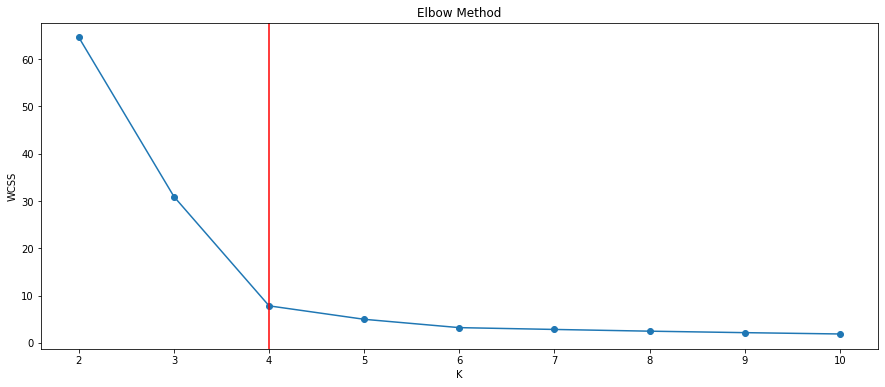

In [ ]:
# Elbow Method

import matplotlib.pyplot as plt
import numpy as np
data = df.to_numpy()
wcss = []
for n in range(2 , 11): # Amount of values to be tested for K
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(data)
    wcss.append(algorithm.inertia_)
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss , 'o', color='tab:blue')
plt.plot(np.arange(2 , 11) , wcss , '-')
plt.xlabel('K') , plt.ylabel('WCSS')
plt.axvline(x=4 , c='r')
plt.title('Elbow Method')
plt.show()

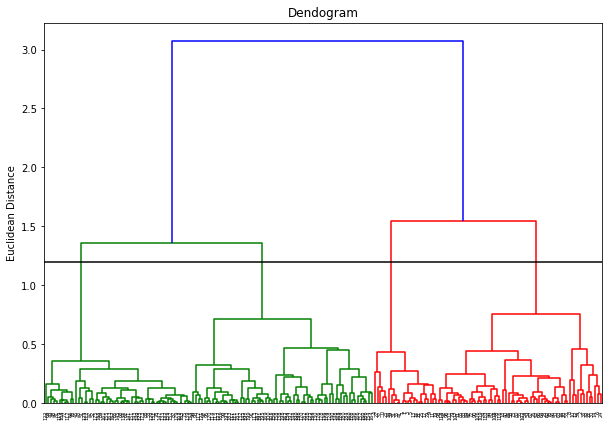

In [ ]:
# Dendogram 

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
plt.axhline(y=1.2 , color='k')
plt.ylabel('Euclidean Distance')
dend = shc.dendrogram(shc.linkage(df, method='complete'))

# Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
K=5
cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage='complete')
# cluster.fit_predict(df)

Text(0.5, 1.0, 'Silhouette method 1')

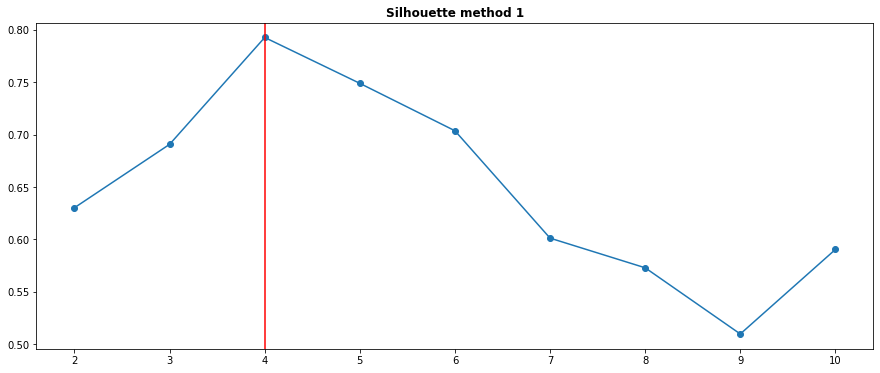

In [ ]:
# Silhouette Method

import scipy.cluster.hierarchy as sch # Dendograma
from sklearn.metrics import silhouette_score 
range_of_clusters=range(2,11)
scores=[]
for k in range_of_clusters:
    km = KMeans(n_clusters=k,init = 'random', n_init = 10 ,max_iter=500, tol=0.0001)
    km.fit(data)
    scores.append(silhouette_score(data , km.labels_))
    
# ploting
plt.figure(figsize=(15,6)) 
plt.plot(range_of_clusters , scores , marker='o' )
plt.axvline(x=4 , c='r')
plt.title("Silhouette method 1" , fontweight='bold')


Final result

In [ ]:
kmeans(df, 4,init = 'k-means++', n_init = 1000 ,max_iter=1000, tol=0.0001)
plot_kmeans(df)